In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.10.1
sys.version_info(major=3, minor=8, micro=17, releaselevel='final', serial=0)
matplotlib 3.7.2
numpy 1.24.4
pandas 2.0.3
sklearn 1.3.0
tensorflow 2.10.1
keras.api._v2.keras 2.10.0


In [3]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)



In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for i in range(10):
    model.add(keras.layers.Dense(50,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.SGD(0.001),metrics=['accuracy'])

In [12]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 50)                39250     
                                                                 
 dense_23 (Dense)            (None, 50)                2550      
                                                                 
 dense_24 (Dense)            (None, 50)                2550      
                                                                 
 dense_25 (Dense)            (None, 50)                2550      
                                                                 
 dense_26 (Dense)            (None, 50)                2550      
                                                                 
 dense_27 (Dense)            (None, 50)               

In [13]:
len(model.layers)


12

In [15]:
logdir='./dnn-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file=os.path.join(logdir,'fashion_mnist_model.h5')
callbacks=[
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3),

]

history=model.fit(x_train_scaled,y_train,epochs=100,validation_data=(x_valid_scaled,y_valid),callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5154 - accuracy: 0.8093 - val_loss: 0.5007 - val_accuracy: 0.8178

In [16]:
history.history


{'loss': [0.5153594613075256,
  0.5005761384963989,
  0.4851621389389038,
  0.4693669378757477,
  0.45533379912376404,
  0.44091227650642395,
  0.43035686016082764,
  0.42132827639579773,
  0.4128457009792328,
  0.4051108658313751,
  0.39795583486557007,
  0.39131736755371094,
  0.3852677345275879,
  0.380439817905426,
  0.37526804208755493,
  0.3696489930152893,
  0.3651480972766876,
  0.360678493976593,
  0.3564271628856659,
  0.3522273004055023,
  0.3483026623725891,
  0.3442590832710266,
  0.3408772945404053,
  0.33734795451164246,
  0.33414527773857117,
  0.3313003182411194,
  0.3278007507324219,
  0.3247740864753723,
  0.32137972116470337,
  0.3188977539539337,
  0.3158973753452301,
  0.31428125500679016,
  0.31041455268859863],
 'accuracy': [0.8093454837799072,
  0.8164727091789246,
  0.8252545595169067,
  0.831745445728302,
  0.8361999988555908,
  0.841981828212738,
  0.845054566860199,
  0.8493636250495911,
  0.8512181639671326,
  0.8527091145515442,
  0.8562363386154175,
  0.

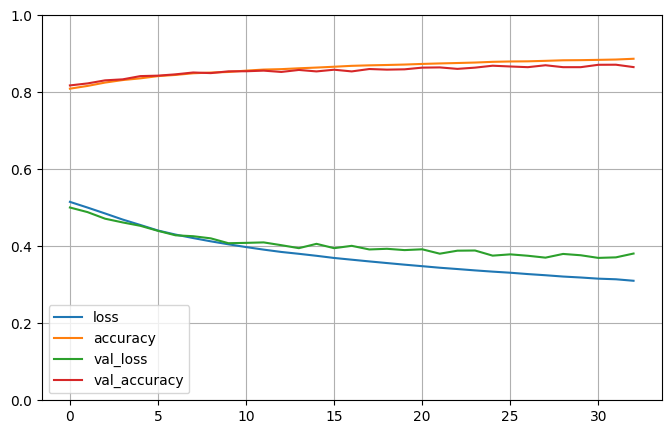

In [18]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [19]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.40977850556373596, 0.8551999926567078]